## ChatBot Traning Data
* Covid Q&A
* Covid Live Count
* Greetings
* Covid News

## Covid Q&A

In [1]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
url = 'https://www.cdc.gov/coronavirus/2019-ncov/faq.html'
response = requests.get(url)

In [3]:
soup = BeautifulSoup(response.text, "html.parser")

In [4]:
soup.findAll('span',role='heading')[0].getText()

'What is a novel coronavirus?'

In [5]:
soup.findAll("div", {"class": "card-body"})[3].getText()

'A novel coronavirus is a new coronavirus that has not been previously identified. The virus causing coronavirus disease 2019 (COVID-19), is not the same as the\xa0coronaviruses that commonly circulate among humans\xa0and cause mild illness, like the common cold.'

In [6]:
q = []
a = []
for i in range(len(soup.findAll('span',role='heading'))):
           q.append(soup.findAll('span',role='heading')[i].getText())  
           a.append(soup.findAll("div", {"class": "card-body"})[i+3].getText()) 

In [7]:
q = q[:99]
a = a[:99]

In [8]:
url = "https://www.fda.gov/emergency-preparedness-and-response/coronavirus-disease-2019-covid-19/covid-19-frequently-asked-questions"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

In [9]:
import re
soup.findAll("div",{"class": "panel panel-default fda-accordion-panel"})[0]

<div class="panel panel-default fda-accordion-panel" open="no" title="Q: What is the FDA doing to respond to the COVID-19 pandemic?">
<div class="panel-heading" id="heading_5fce734a94d6a" role="tab">
<h2 class="panel-title">
<a aria-controls="5fce734a94d6a" class="collapsed" data-parent="" data-toggle="collapse" href="#5fce734a94d6a" role="button">Q: What is the FDA doing to respond to the COVID-19 pandemic?</a>
</h2>
</div>
<div aria-labelledby="heading_5fce734a94d6a" class="panel-collapse collapse collapsed" id="5fce734a94d6a" role="tabpanel">
<div class="panel-body">
<p>A: The FDA, along with other federal, state, and local agencies and public health officials across the country and internationally, plays a critical role in protecting public health during the COVID-19 pandemic. FDA staff are working around the clock to support development of  <a data-entity-substitution="canonical" data-entity-type="node" data-entity-uuid="8f180820-8778-4836-aed9-f85a9824a8ce" href="/emergency-prepa

In [10]:
for i in range(len(soup.findAll("div",{"class": "panel panel-default fda-accordion-panel"}))):
    c = soup.find_all('div', attrs={'title': re.compile('^Q:*')})[i].getText()
    l = c.split("A:")
    q.append(l[0].split('Q:'))
    a.append(l[1])  

In [11]:
data = {'Questions':q , 'Answers':a} 
chat = pd.DataFrame(data)
chat

,Questions,Answers
0,What is a novel coronavirus?,A novel coronavirus is a new coronavirus that ...
1,Why is the disease being called coronavirus di...,"On February 11, 2020 the World Health Organiza..."
2,How does the virus spread?,\n\nThe virus that causes COVID-19 most common...
3,Will warm weather stop the outbreak of COVID-19?,It is not yet known whether weather and temper...
4,What is community spread?,Community spread means people have been infect...
...,...,...
177,"[\n\n\n, If my pet previously had a species-s...",There are no data to suggest that current or ...
178,"[\n\n\n, If my pet has been vaccinated for sp...",Species-specific coronavirus vaccines are unl...
179,"[\n\n\n, My pet has health problems and goes ...",While you should not avoid necessary visits t...
180,"[\n\n\n, Is it safe to adopt pets from a shel...","There is no reason to think that any animals,..."


In [12]:
chat["Questions"].tail

<bound method NDFrame.tail of 0                           What is a novel coronavirus?
1      Why is the disease being called coronavirus di...
2                             How does the virus spread?
3       Will warm weather stop the outbreak of COVID-19?
4                              What is community spread?
                             ...                        
177    [\n\n\n,  If my pet previously had a species-s...
178    [\n\n\n,  If my pet has been vaccinated for sp...
179    [\n\n\n,  My pet has health problems and goes ...
180    [\n\n\n,  Is it safe to adopt pets from a shel...
181    [\n\n\n,  Are there going to be any animal dru...
Name: Questions, Length: 182, dtype: object>

In [13]:
#Question and its respective answer
a = 'What is a novel coronavirus?'

for i in range(len(chat['Questions'])):
    if a == chat['Questions'][i]:
        print(chat['Answers'][i])
        break

A novel coronavirus is a new coronavirus that has not been previously identified. The virus causing coronavirus disease 2019 (COVID-19), is not the same as the coronaviruses that commonly circulate among humans and cause mild illness, like the common cold.


In [14]:
len(chat['Questions'])

182

In [ ]:
# From this point we get an unreadable question. found this statement while viewing in st.selectbox
list(chat['Questions']).index(['\n\n\n', ' What is the FDA doing to respond to the COVID-19 pandemic?\n\n\n\n\n'])

In [ ]:
# All the list of unreadable statements
chat['Questions'][99:]

In [ ]:
# Made Changes in chat
i= 99
while i < len(chat['Questions']):
    a = (chat['Questions'][i])
    a = a[1].split('?')[0]+'?'
    a = a.split(' ')
    a = ' '.join(map(str, a[1:]))
    chat['Questions'][i] = a
    print(chat['Questions'][i])
    i+=1

### Covid Live Count

In [2]:
from selenium import webdriver
from time import sleep
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
import os
from IPython.display import display, Image

In [1]:
def capture(txt):
    
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')
    options.add_argument('--start-maximized')
    driver = webdriver.Chrome(ChromeDriverManager().install(),chrome_options=options)
    driver.get(txt)
    driver.get_screenshot_as_file("capture.png")
    driver.quit()
#     from IPython.display import display, Image
#     display(Image(filename='capture.png'))
    #os.remove('capture.png')

[WDM] - Current google-chrome version is 86.0.4240
[WDM] - Get LATEST driver version for 86.0.4240
[WDM] - Driver [/Users/siddharthmandgi/.wdm/drivers/chromedriver/mac64/86.0.4240.22/chromedriver] found in cache


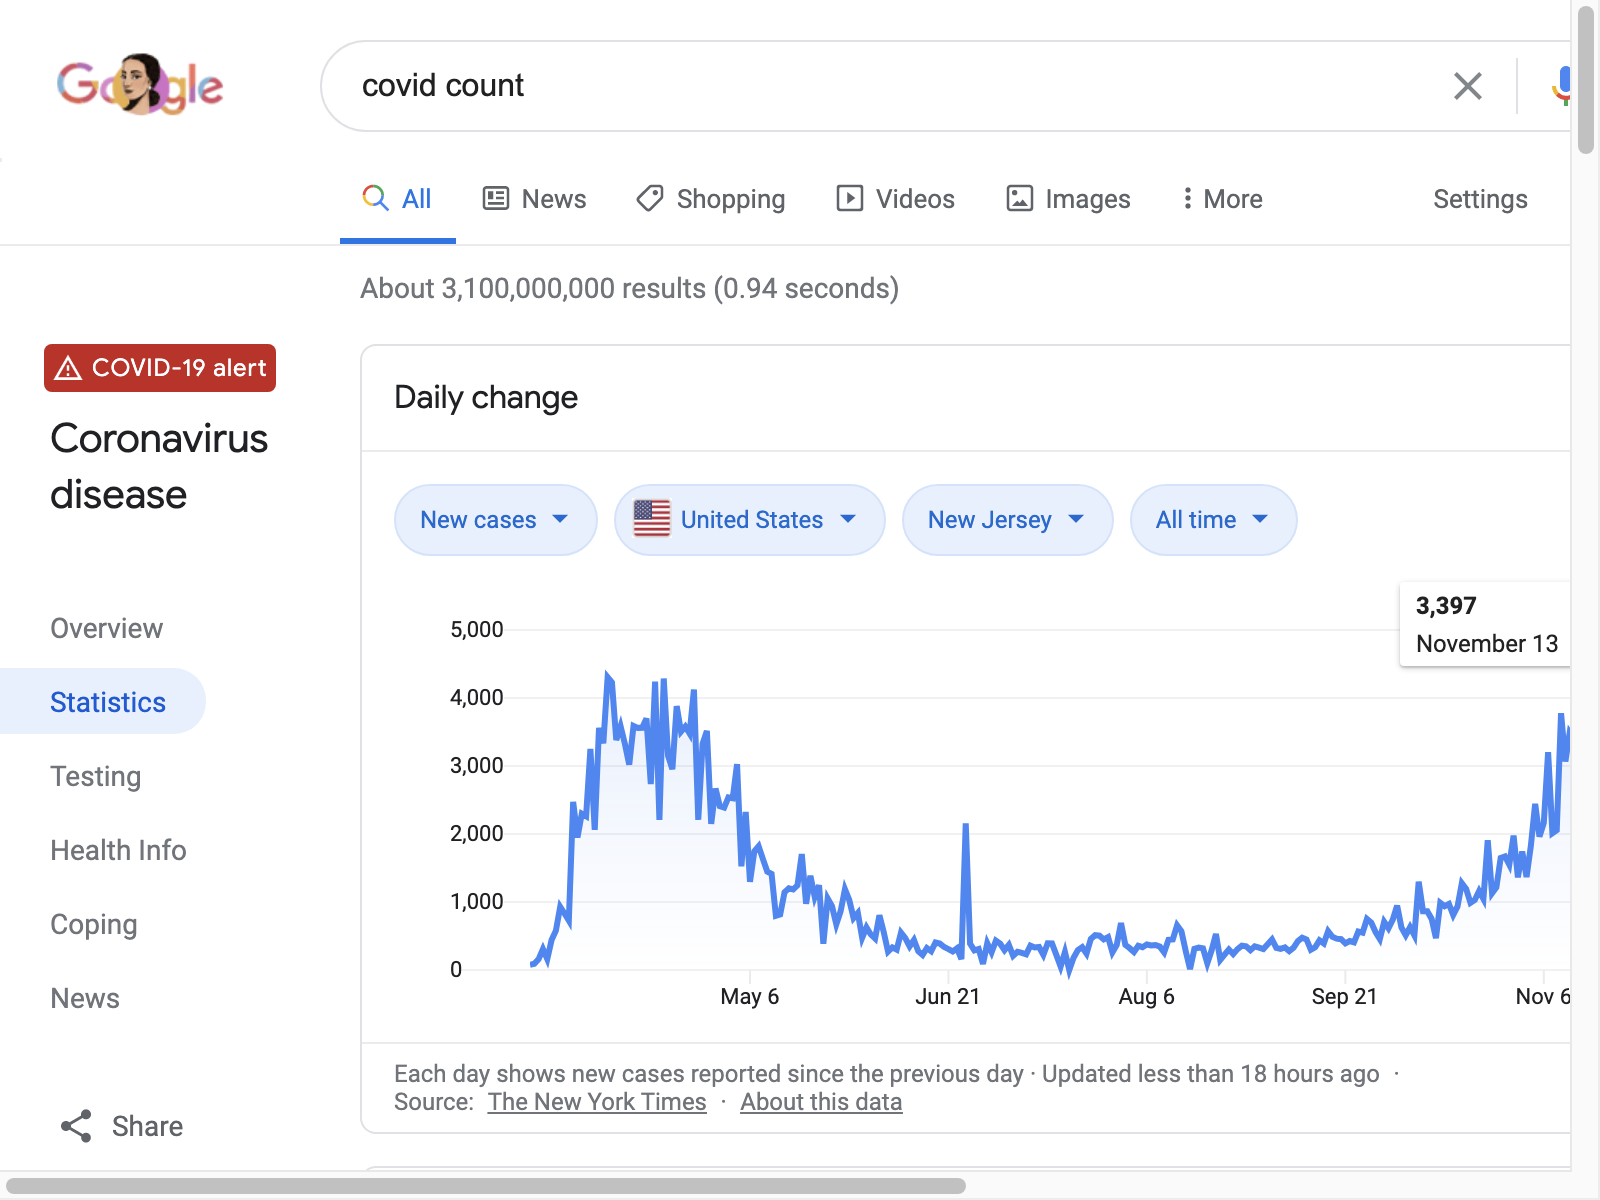

In [5]:
a = capture('https://www.google.com/search?rlz=1C5CHFA_enUS877US877&ei=0dSuX5vjM6-RggeS1464DA&q=covid+count&oq=covid+count&gs_lcp=CgZwc3ktYWIQAzILCAAQsQMQgwEQyQMyBQgAEJIDMgUIABCSAzIICAAQsQMQgwEyCAgAELEDEIMBMggIABCxAxCDATICCAAyAggAMggIABCxAxCDATIICAAQsQMQgwE6BAgAEEc6BAgAEEM6CggAELEDEIMBEEM6BwgAELEDEEM6CAgAELEDEMkDOg4IABCxAxCDARDJAxCRAjoFCAAQsQNQghVYrCVg6ydoAHADeACAAYICiAHVB5IBBTIuMi4ymAEAoAEBqgEHZ3dzLXdpesgBBsABAQ&sclient=psy-ab&ved=0ahUKEwjbj_y2l4DtAhWviOAKHZKrA8cQ4dUDCA0&uact=5')

### Greetings

In [258]:

# if there_exists(['hey','hi','hello','greetings','howdy']):
#         greetings = [f"Hello Sir., How can I help you today.", f"Hello Sir"]
#         greet = greetings[random.randint(0,len(greetings)-1)]
#         speak(greet)
        
#     # 2: greetings (how are you)
#     if there_exists(["how are you","how are you doing","how have you been"]):
#         speak(f"I'm very well Sir, thank you for asking.")
        
#     #3: greetings (whats'up)
#     if there_exists(["what is up", "what's up", "what is cracking", "what's cracking", "what is good", "what's good", 
#                     "what is happening", "what's happening", 
#                      "what is new", "what's new", "what is neww"]):  
#         speak('A lot actually Sir! I am currently becoming more self aware and you are doing a fantastic job helping me!')     

[WDM] - Current google-chrome version is 86.0.4240
[WDM] - Get LATEST driver version for 86.0.4240
[WDM] - Driver [/Users/siddharthmandgi/.wdm/drivers/chromedriver/mac64/86.0.4240.22/chromedriver] found in cache


 
1600 1200


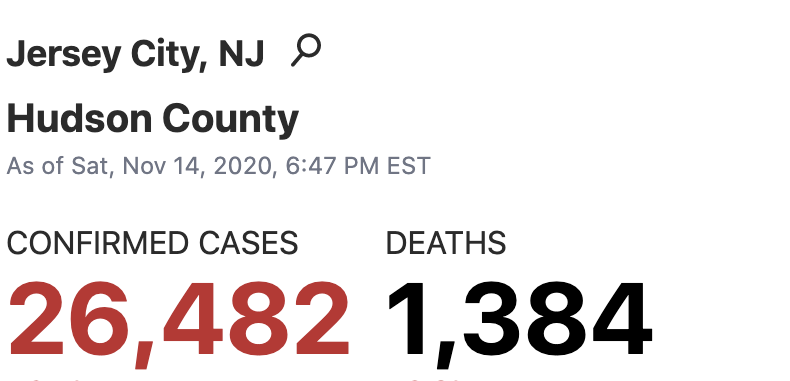

In [42]:
from PIL import Image
b = capture("https://weather.com/coronavirus/l/40.7286,-74.0775")
im = Image.open("capture.png") 

  
# Size of the image in pixels (size of orginal image) 
# (This is not mandatory) 
width, height = im.size 
print(width,height)
  
# Setting the points for cropped image 
left = 50
top = height / 4 + 500
right = 1600 - 760
bottom = 1200 - 19
  
# Cropped image of above dimension 
# (It will not change orginal image) 
im1 = im.crop((left, top, right, bottom)) 
  
# Shows the image in image viewer 
display(im1)

1200 1200


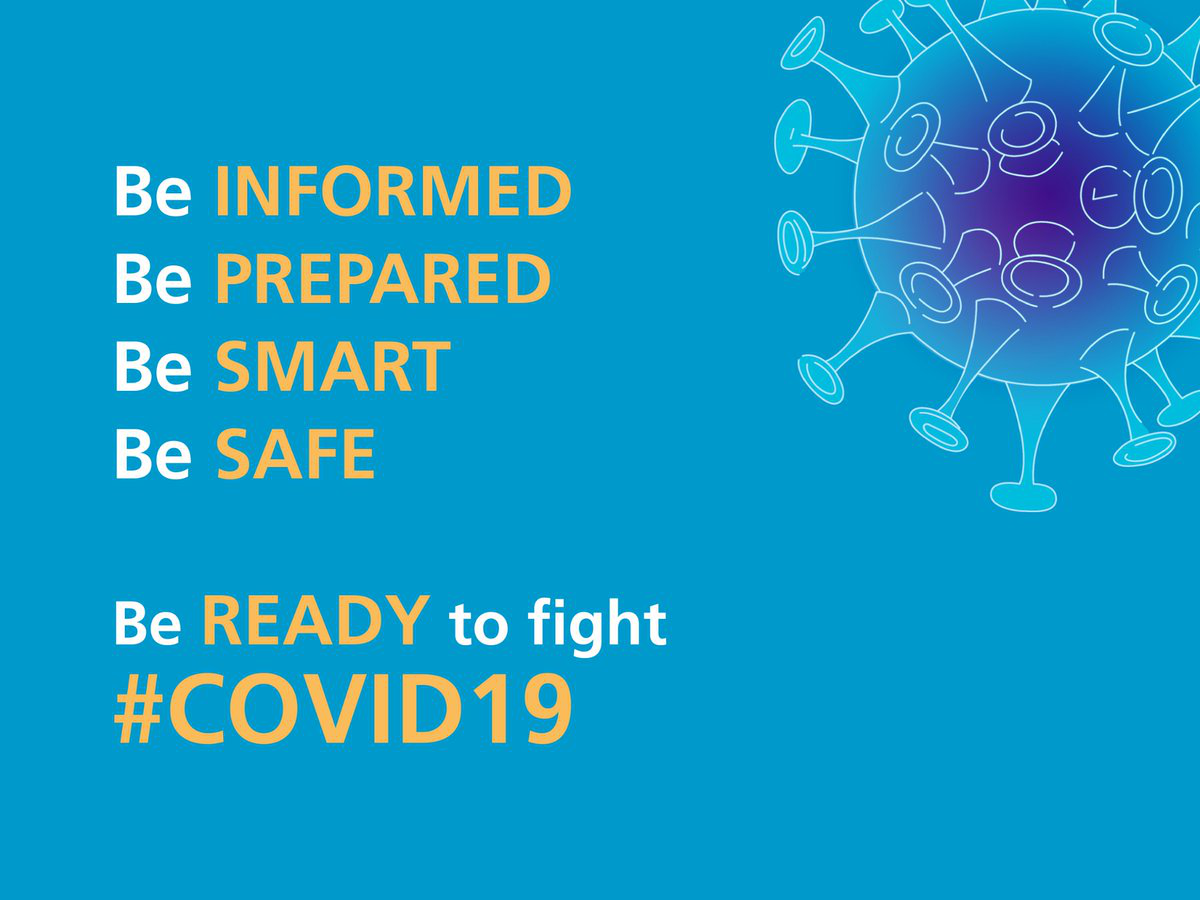

In [7]:
from PIL import Image
# b = capture("https://weather.com/coronavirus/l/40.7286,-74.0775")
im = Image.open("A.jpg") 

  
# Size of the image in pixels (size of orginal image) 
# (This is not mandatory) 
width, height = im.size 
print(width,height)
  
# Setting the points for cropped image 
left = 0
top = 0
right = 1200
bottom = 1200 - 300
  
# Cropped image of above dimension 
# (It will not change orginal image) 
im1 = im.crop((left, top, right, bottom)) 
  
# Shows the image in image viewer 
display(im1)